### Problem 2. kNN Predictions

We load the data from the .txt file, assign it to target and feature variables.
We then shuffle the data randomly.
And split the data into training and validation sets in the ratio 75:25 for both the targets and features.

In [35]:
#Load, shuffle and split the data
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
iris = np.genfromtxt("data/iris.txt",delimiter=None)
Y = iris[:,-1]
X = iris[:,0:-1]

X,Y = ml.shuffleData(X,Y);

Xtrain,Xvalid,Ytrain,Yvalid = ml.splitData(X,Y, 0.75);

1. Modify the code listed above to use only the first two features of X (e.g., let X be only the first two columns
of iris , instead of the first four), and visualize (plot) the classification boundary for varying values of
K = [1, 5, 10, 50] using plotClassify2D.

We modify the code mentioned in the question and use it as shown in the code listing below to plot the classification boundary for different values of K for a kNN classifier. We use only the first 2 features by using Xtrain[:,0:2] in the following way:

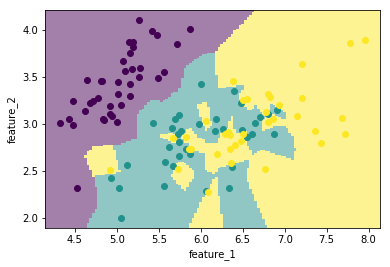

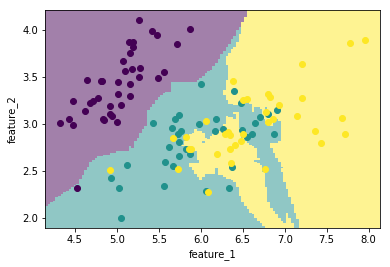

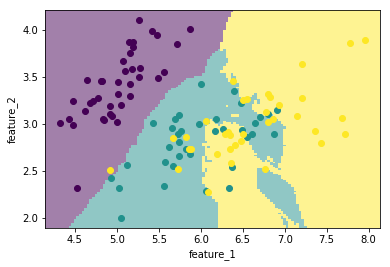

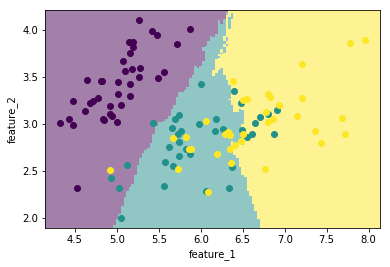

In [36]:
# 1. Classification boundaries for first two features for various values of k
KA = [1, 5, 10, 50]

for k in KA:
    knn = ml.knn.knnClassify()
    knn.train(Xtrain[:,0:2], Ytrain, k)
    plt.xlabel('feature_1')
    plt.ylabel('feature_2')
    ml.plotClassify2D(knn, Xtrain[:,0:2], Ytrain)
    plt.show()

2. Again using only the first two features, compute the error rate (number of mis-classifications) on both the
training and validation data as a function of K = [1, 2, 5, 10, 50, 100, 200]. You can do this most easily with a
for-loop:

For each value of k, we calculate the training error and validation error and store in two arrays trainErr and validErr. For each value of k, we train the learner ml.knn.knnClassify() using only the first two features Xtrain[:,0:2] and predict the class in variable Ytrain_hat and Yvalid_hat on the training and validation dataset respectively. Then for each datapoint in the Ytrain_hat and Yvalid_hat dataset, we check if it matches the target value in the training and validation set and increment the error by 1 if it does not match. Error is defined as no. of mismatches divided by total no. of data points. Then the training error is plotted in red and validation error in green on a semilog scale with k value on the x-axis and error on the y-axis.

From looking at the plots below, we can select the value of k as 2 or 5 since, the training error increases from 2 to 2 but stays almost parallel to the x-axis between 2 to 5 and then has a positive slope from 5 onwards, meaning the training error continuously increases from 5 onwards. Therefore, either 2 or 5 is a good choice for value of k.

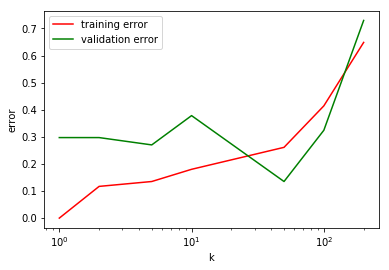

In [37]:
# 2. Training error and validation error of first two features in semi-log plot
KA = [1, 2, 5, 10, 50, 100, 200]
trainErr = []
validErr = []

for k in KA:
    learner = ml.knn.knnClassify()
    learner.train(Xtrain[:,0:2], Ytrain, k)

    Ytrain_hat = learner.predict(Xtrain[:,0:2])
    length = Ytrain_hat.shape[0]
    count = 0
    for j in range(0, length):
        if Ytrain_hat[j] != Ytrain[j]:
            count = count + 1
    trainErr.append(count / length)

    Yvalid_hat = learner.predict(Xvalid[:,0:2])
    length = Yvalid_hat.shape[0]
    count = 0
    for j in range(0, length):
        if Yvalid_hat[j] != Yvalid[j]:
            count = count + 1
    validErr.append(count / length)

plt.semilogx(KA, trainErr, c='r', label="training error")
plt.semilogx(KA, validErr, c='g', label="validation error")
plt.xlabel('k')
plt.ylabel('error')
plt.legend()
plt.show()


3. Provide the same plots as the previous, but with all the features in the dataset. Are the plots very different?
Is your recommendation different?

We follow the same steps as in 2. above but this time for all feature we use Xtrain whole instead of Xtrain[:,0:2].

In this case we notice that the plots are different and the ideal value of k would be 10, since the training error is lowest in this case.

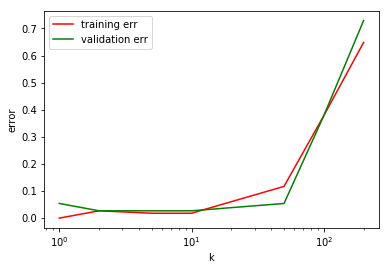

In [38]:
# 3. Same plot as in 2. but for all features

KA = [1, 2, 5, 10, 50, 100, 200]
trainErr = []
validErr = []

for k in KA:
    learner = ml.knn.knnClassify()
    learner.train(Xtrain, Ytrain, k)

    Ytrain_hat = learner.predict(Xtrain)
    length = Ytrain_hat.shape[0]
    count = 0
    for j in range(0, length):
        if Ytrain_hat[j] != Ytrain[j]:
            count = count + 1
    trainErr.append(count / length)

    Yvalid_hat = learner.predict(Xvalid)
    length = Yvalid_hat.shape[0]
    count = 0
    for j in range(0, length):
        if Yvalid_hat[j] != Yvalid[j]:
            count = count + 1
    validErr.append(count / length)

plt.semilogx(KA, trainErr, c='r', label="training err")
plt.semilogx(KA, validErr, c='g', label="validation err")
plt.xlabel('k')
plt.ylabel('error')
plt.legend()
plt.show()